# Twitter Sentiment Analysis - Fake Covid-19 dataset

We've used the following packages:

In [20]:
import plotly.express as px
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import json
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from nltk.corpus import stopwords
import itertools
import altair as alt
from dateutil.parser import parse
from IPython.core.display import Image, display
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Then we have defined the following functions to clean the tweets' text:

In [2]:
#def remove_emoticons(text):
#    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
#    return emoticon_pattern.sub(r'', text)

#def remove_emoji(text):
#    emoji_pattern = re.compile("["
#                           u"\U0001F600-\U0001F64F"  # emoticons
#                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                           u"\U00002702-\U000027B0"
#                           u"\U000024C2-\U0001F251"
#                           "]+", flags=re.UNICODE)
#    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

#def give_emoji_free_text(text):
#    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [62]:
csv_dataframe = pd.read_csv('fakecovid/dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
data1 = data
data2 = data

## Pie chart

We're interested in the "full_text" field, that it has been cleaned with specific functions.  
We've used **SentimentIntensityAnalyzer** to calculate positive, negative and neutral sentiment scores from the text.

In [4]:
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
positive_scores = []
neutral_scores = []
negative_scores = []
id_positive = []
id_neutral = []
id_negative = []

index=0
stop_words = stopwords.words('english')

for element in data:
    #data[index]['full_text'] = data[index]['full_text'].lower()                 # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])    # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    #data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    #data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    #data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                  # No amp with space
    #data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])   # Remove hashtags
    #data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])   # No mentions
    #data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    #data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^RT ", " ", data[index]['full_text'])    # No RT
    #data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])  # Remove big spaces
    
    tweet_list.append(data[index]['full_text'])
    #analysis = TextBlob(data[index]['full_text'])
    #print(analysis.sentiment)
    score = SentimentIntensityAnalyzer().polarity_scores(data[index]['full_text'])
    
    #print(data[index]['full_text'])
    #print(score['compound'])
    #print(" ")
    if score['compound']>0.05:
        positive_list.append(data[index]['full_text'])
        positive_scores.append(score['compound'])
        id_positive.append(data[index]['id_str'])
    elif score['compound']<-0.05:
        negative_list.append(data[index]['full_text'])
        negative_scores.append(score['compound'])
        id_negative.append(data[index]['id_str'])
    else:
        neutral_list.append(data[index]['full_text'])
        neutral_scores.append(score['compound'])
        id_neutral.append(data[index]['id_str'])
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.



We've reported the number of tweets (Positive, Negative, Neutral) in a DataFrame in order to visualise them:

In [5]:
print("Total number of tweets: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))

category = []
count = []

categorypositive = ["Positive"] * len(positive_list)
categoryneutral = ["Neutral"] * len(neutral_list)
categorynegative = ["Negative"] * len(negative_list)

category = categorypositive + categoryneutral + categorynegative

count = Counter(category)

df_fake1 = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_fake1 = df_fake1.rename(columns={'index':'Category', 0:'Count'})

Total number of tweets:  1454
Positive number:  586
Negative number:  546
Neutral number:  322


Then we have created the pie chart:

In [6]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
fig_fake1 = px.pie(df_fake1, values='Count', names='Category',
             title='Tweets percentage classified by sentiment - Fake Covid-19 dataset')
fig_fake1.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
fig_fake1.show()

## A few examples...

### An example of a tweet with a positive sentiment score

In [7]:
ind = positive_scores.index(max(positive_scores))
print("https://twitter.com/anyuser/status/" + id_positive[ind])

https://twitter.com/anyuser/status/1245941756488634368


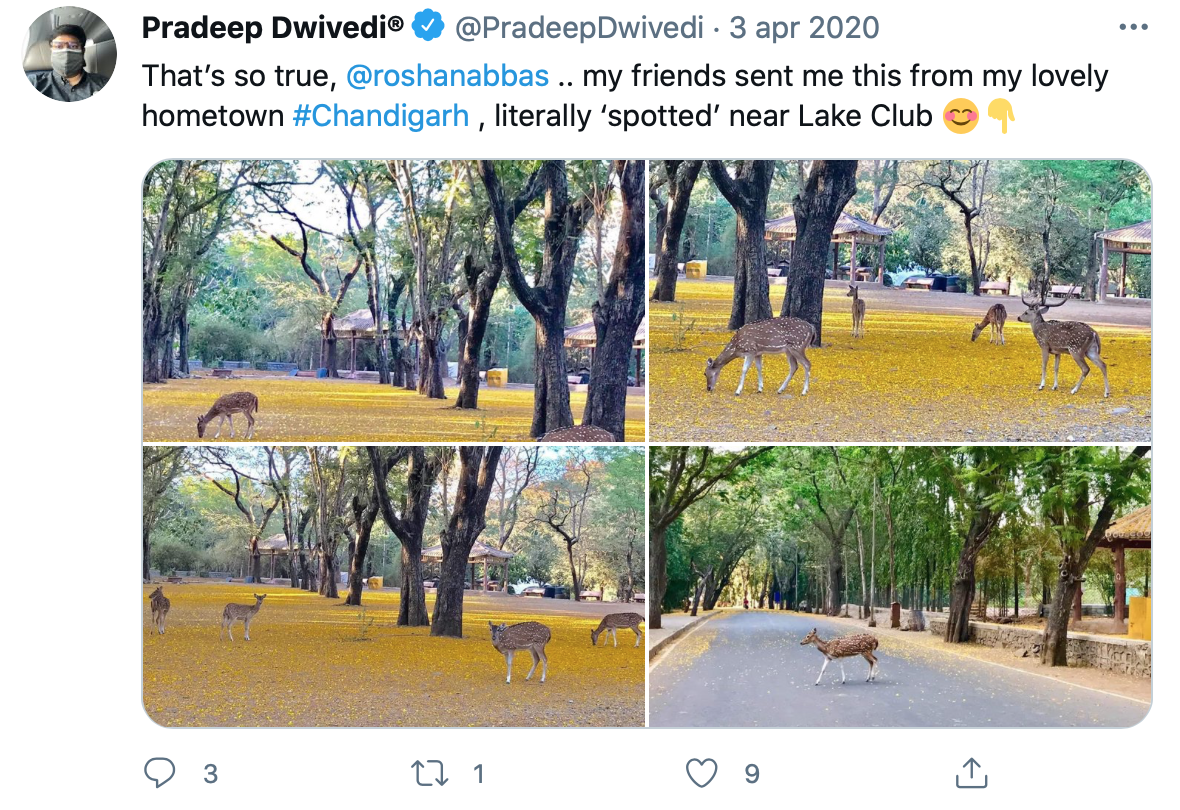

**Why is this tweet fake?** https://newschecker.in/english/pictures-of-deer-strolling-on-road-are-not-from-chandigarh-here-s-the-reality

### An example of a tweet with a negative sentiment score

In [8]:
negative_scores.sort()
print(negative_scores[9])
ind = negative_scores.index(negative_scores[9])
print("https://twitter.com/anyuser/status/" + id_negative[ind])

-0.9287
https://twitter.com/anyuser/status/1265507998761463811


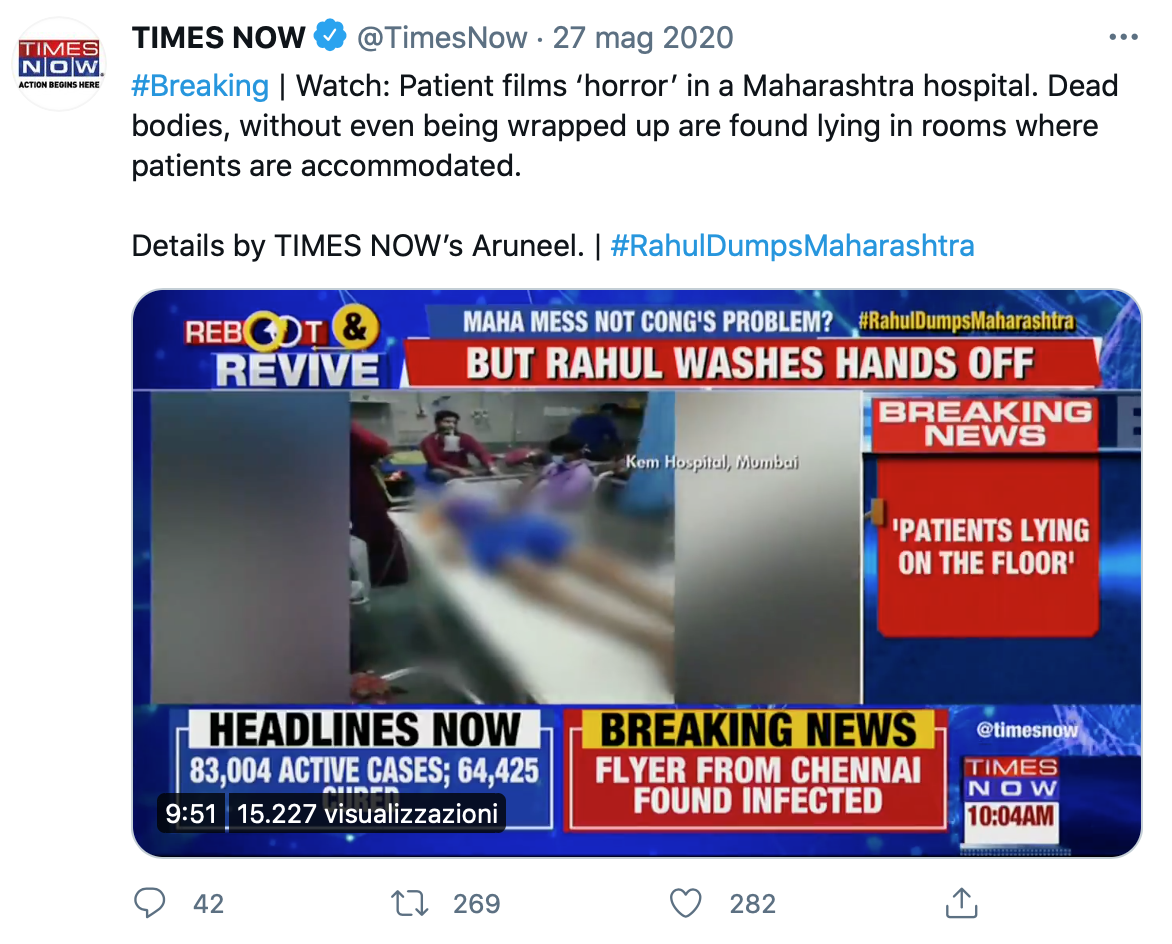

**Why is this tweet fake?** https://factly.in/this-video-shows-the-terrible-situation-at-a-hospital-in-mumbai-kem-hospital-not-delhi/

### An example of a tweet with a neutral sentiment score

In [9]:
neutral_scores.sort()
print("It is considered a neutral tweet but it has slight polarity to negative, its score is "+str(neutral_scores[12]))
ind = neutral_scores.index(neutral_scores[12])
print("https://twitter.com/anyuser/status/" + id_neutral[ind])

#display(Image('grafici/maxpospf.jpg', width=500, unconfined=True))

It is considered a neutral tweet but it has slight polarity to negative, its score is -0.0258
https://twitter.com/anyuser/status/1252420840957730816


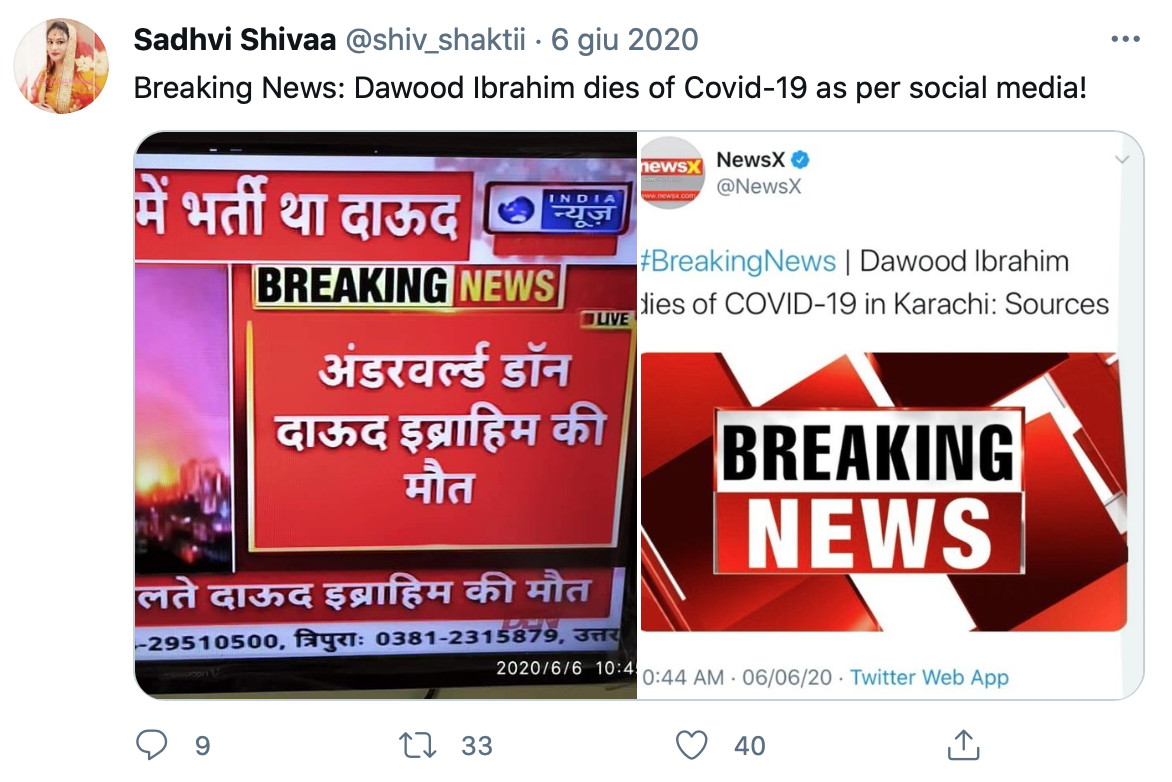

**Why is this tweet fake?** https://newsmeter.in/claim-that-dawood-ibrahim-died-of-covid-19-is-false/

### Distribution of sentiment values classified by sentiment category and tweet type (False, Partially False)

In [13]:
tweet_list = []
scores = []
category = []
sentiment = []

index=0

for element in data1:
    token_id = data1[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data1[index]['full_text'] = remove_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_twitter_urls(data1[index]['full_text'])
    data1[index]['full_text'] = noamp(data1[index]['full_text'])                  # No amp with space
    data1[index]['full_text'] = re.sub("^RT ", " ", data1[index]['full_text'])    # No RT
    
    tweet_list.append(data1[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data1[index]['full_text'])
    
    if lista_unica_csv[indice_csv+1].lower() == "false":
        if score['compound']>0.05:
            scores.append(score['compound'])
            category.append("false")
            sentiment.append("positive")
        elif score['compound']<-0.05:
            scores.append(score['compound'])
            category.append("false")
            sentiment.append("negative")
        else:
            scores.append(score['compound'])
            category.append("false")
            sentiment.append("neutral")
            
    elif lista_unica_csv[indice_csv+1].lower() == "partially false":
        if score['compound']>0.05:
            scores.append(score['compound'])
            category.append("partially false")
            sentiment.append("positive")
        elif score['compound']<-0.05:
            scores.append(score['compound'])
            category.append("partially false")
            sentiment.append("negative")
        else:
            scores.append(score['compound'])
            category.append("partially false")
            sentiment.append("neutral")
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.


df_fake1 = pd.DataFrame(
    {'Scores':scores,
    'Type': category,
     'Sentiment': sentiment
    })

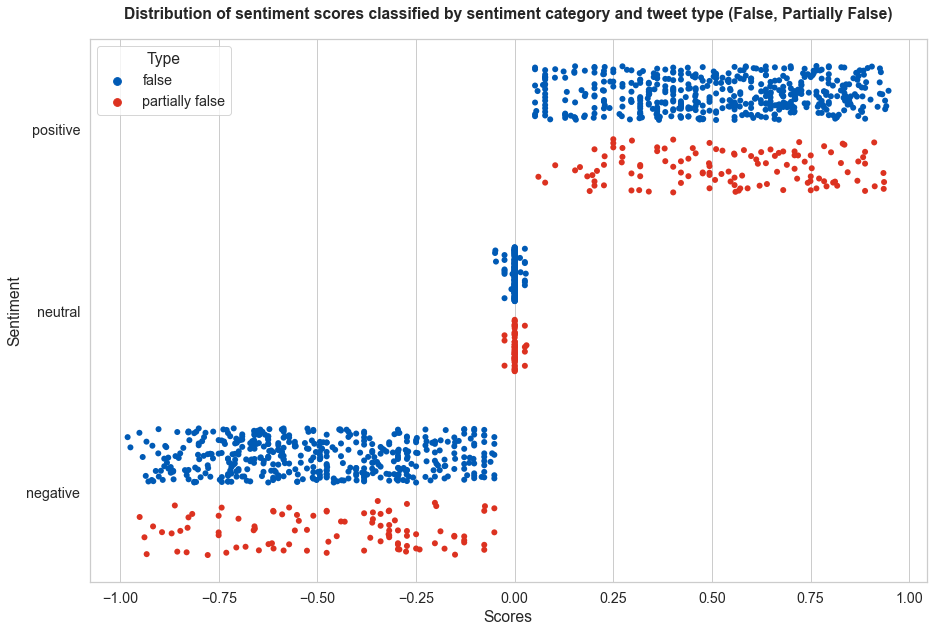

In [102]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['axes.titlepad'] = 20 

sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

p = sns.stripplot(data=df_fake1,
                    x='Scores',
                    y='Sentiment',
                    hue='Type',
                    jitter=0.30,
                    dodge=True,
                    orient='h',
                    size=6,
                 palette=["#005AB5","#DC3220"]).set_title('Distribution of sentiment scores classified by sentiment category and tweet type (False, Partially False)', weight='bold')

As we can see from the chart the score values are covering pretty much all the values for each category

### Frequency of positive, neutral, negative tweets classified by their category (false, partially false)

In [86]:
positivefalse = 0
positivepfalse = 0
neutralfalse = 0
neutralpfalse = 0
negativefalse = 0
negativepfalse = 0

scorepositivefalse = 0
scorepositivepfalse = 0
scoreneutralfalse = 0
scoreneutralpfalse = 0
scorenegativefalse = 0
scorenegativepfalse = 0

index=0

for element in data2:
    token_id = data2[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data2[index]['full_text'] = remove_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_twitter_urls(data2[index]['full_text'])
    data2[index]['full_text'] = noamp(data2[index]['full_text'])                  # No amp with space
    data2[index]['full_text'] = re.sub("^RT ", " ", data2[index]['full_text'])    # No RT
    
    tweet_list.append(data2[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data2[index]['full_text'])
    
    if lista_unica_csv[indice_csv+1].lower() == "false":
        if score['compound']>0.05:
            positivefalse = positivefalse + 1
            scorepositivefalse = scorepositivefalse + score['compound']
        elif score['compound']<-0.05:
            scorenegativefalse = scorenegativefalse + score['compound']
            negativefalse = negativefalse + 1
        else:
            scoreneutralfalse = scoreneutralfalse + score['compound']
            neutralfalse = neutralfalse + 1
            
    elif lista_unica_csv[indice_csv+1].lower() == "partially false":
        if score['compound']>0.05:
            positivepfalse = positivepfalse + 1
            scorepositivepfalse = scorepositivepfalse + score['compound']
        elif score['compound']<-0.05:
            negativepfalse = negativepfalse + 1
            scorenegativepfalse = scorenegativepfalse + score['compound']
        else:
            scoreneutralpfalse = scoreneutralpfalse + score['compound']
            neutralpfalse = neutralpfalse + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

#count = [positivefalse, positivepfalse, negativefalse, negativepfalse, neutralfalse, neutralpfalse]
#tipo = ["false", "partially false","false", "partially false","false", "partially false"]
#sentiment = ["Positive", "Positive", "Negative","Negative","Neutral","Neutral"]
count = [positivefalse,negativefalse,neutralfalse, positivepfalse,negativepfalse,neutralpfalse]
tipo = ["Positive", "Negative","Neutral", "Positive", "Negative","Neutral"]
sentiment = ["False", "False", "False","Partially False","Partially False","Partially False"]
df_fake2 = pd.DataFrame(
    {'Scores':count,
    'Type': tipo,
     'Sentiment': sentiment
    })

print(df_fake2)

   Scores      Type        Sentiment
0     468  Positive            False
1     450  Negative            False
2     252   Neutral            False
3     118  Positive  Partially False
4      96  Negative  Partially False
5      70   Neutral  Partially False


In [111]:
range_ = ['#DC3220', '#005AB5', '#1AFF1A']
bars = alt.Chart(df_fake2).mark_bar().encode(
    x=alt.X('Scores:Q',title="Tweet count"),
    y=alt.Y('Type:N',title=None,axis=alt.Axis(labels=False)),
    color=alt.Color('Type:N', scale=alt.Scale(range=range_),title="Category"),
    row= alt.Row('Sentiment:N', title="Sentiment",header=alt.Header(labelFontWeight="bold"))
).properties(
    title="Frequency of positive, neutral and negative tweets classified by category (False, Partially False)", 
    width=700,
    height=100
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=14,
    labelFontSize=12,
).configure_header(
    titleFontSize=15,
    labelFontSize=13
)
bars


alt.Chart(...)